## Import libraries

In [131]:
# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import json

## Load torch-rnn checkpoint

In [140]:
inputs = ['../data/models/1/cv/checkpoint_18700.json',
          '../data/models/2/cv/checkpoint_6250.json',
          '../data/models/3/cv/checkpoint_19250.json',
          '../data/models/4/cv/checkpoint_19250.json',
          '../data/models/5/cv/checkpoint_10250.json']

input_file = inputs[4]

In [141]:
# load input as json
file_data = open(input_file).read()
checkpoint = json.loads(file_data)

# print stats
it_per_epoch = int(checkpoint['val_loss_history_it'][-1]/checkpoint['opt']['max_epochs'])
print('')
print('iteration:         %d' % checkpoint['i'])
# WARNING: this field will only be valid if this is the last checkpoint
print('iterations/epoch:  %d'% it_per_epoch)
print('rnn size:          %d' % checkpoint['opt']['rnn_size'])
print('num layers:        %d' % checkpoint['opt']['num_layers'])
print('batch size:        %d' % checkpoint['opt']['batch_size'])
print('sequence length:   %d' % checkpoint['opt']['seq_length'])
print('learning rate:     %f' % checkpoint['opt']['learning_rate'])
print('dropout:           %f' % checkpoint['opt']['dropout'])





iteration:         10250
iterations/epoch:  732
rnn size:          512
num layers:        2
batch size:        50
sequence length:   100
learning rate:     0.002000
dropout:           0.000000


## Plot loss

checkpoint 7500 contains the minimum validation loss of 0.378453
minimum mean training loss is 0.263410
training/validation difference: -0.115043


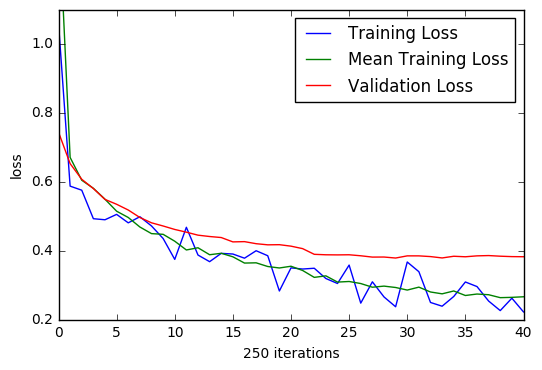

In [142]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

# average the training loss every 250 iterations
mean_training_loss = []
for i in range(0, len(checkpoint['train_loss_history']), 250):
    mean_training_loss.append(mean(checkpoint['train_loss_history'][i : i + 250]))

# use stride of 248 because any iteration that is a multiple of 250 has a
# _very_ high value for some reason. Investigate.
plt.plot(checkpoint['train_loss_history'][250::248], label="Training Loss")
plt.plot(mean_training_loss, label="Mean Training Loss")
plt.plot(checkpoint['val_loss_history'], label="Validation Loss")

plt.ylim([0.2, 1.1])
plt.ylabel('loss')
plt.xlabel('250 iterations')
plt.legend()
# plt.show()

# uncomment to save plot
plt.savefig('training_loss.png')

# find the checkpoint with the minimum validation loss
min_index, min_value_1 = min(enumerate(checkpoint['val_loss_history']), key=lambda v: v[1])
print('checkpoint %d contains the minimum validation loss of %f' % (((min_index + 1) * 250), min_value_1))
min_index, min_value_2 = min(enumerate(mean_training_loss), key=lambda v: v[1])
print('minimum mean training loss is %f' % min_value_2)
print('training/validation difference: %f' % (min_value_2 - min_value_1))

## Print loss at specific iteration

In [143]:
iteration = 19000 # must be evenly divisible by checkpoint_interval

In [101]:
checkpoint_interval = 250
chkpnt = iteration / checkpoint_interval
print("iteration: %d" % iteration)
print("validation loss: %f" % checkpoint['val_loss_history'][chkpnt])
print("mean training loss: %f" % mean_training_loss[chkpnt])

iteration: 19000


IndexError: list index out of range

## Compare models

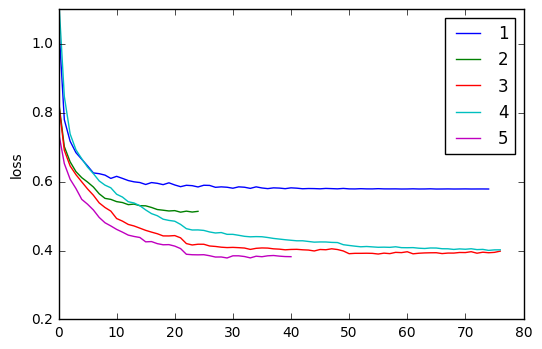

In [103]:
def map_fun(inputs):
    file_data = open(inputs).read()
    return json.loads(file_data)['val_loss_history']

loss = map(map_fun, inputs)

for i in range(len(inputs)):
    plt.plot(loss[i], label=i+1)

plt.ylim([0.2, 1.1])
plt.ylabel('loss')
# plt.xlabel('epochs')
plt.legend()
plt.show()

